# Lesson 5 Exercises

### Exercise 1: Create your own Orbit Visualizer!
You are a budding intern at NASA's Jet Propulsion Laboratory and your first task is to make a program that parses and visualizes TLEs. The objectives of the assignment are as follows:

#### Objectives:
- Create a class entitled `Orbital_Visualizer` which takes in the name of a TLE file within the constructor
- Assign `name`, `line_1`, and `line_2` to empty strings within the constructor
- Assign `tle_file` to the name of a TLE file within the constructor
- Create a variable titled `satellite` and assign it to `None` within the constructor
- Create a method within the class titled `extract_tle_contents` that extracts each line from the TLE file, cleans them, and stores them within `name`, `line_1`, and `line_2`, respectively.
- Create another method titled `parse_tle` that parses the TLE contents from each of the variables and stores them inside of an object that is assigned to `satellite`
- Make two additional fields within `satellite` called `orbital_period` and `semi_major_axis` and set them both to 0
- Create a method called `calc_semimajor` which sets the semi-major axis within the satellite object using `self.satellite["mean_motion"]`
- Create a method called `calc_orbital_period` which sets the orbital period within the satellite object using `self.satellite["semi_major_axis"]`
- Create a method called `plot_orbit` that visualizes the orbit of the TLE using `PyAstronomy` and `matplotlib`

In [41]:
import numpy as np
import math
from PyAstronomy import pyasl
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [64]:
class Orbital_Visualizer:
    def __init__(self, file_name):
        self.name = ""
        self.line_1 = ""
        self.line_2 = ""
        self.satellite = None
        self.tle_file = file_name

    def extract_tle_contents(self):
        with open(self.tle_file, 'r') as file:
            lines = file.readlines()
        
        # Clean and store TLE contents
        self.name = lines[0].strip()
        self.line_1 = lines[1].strip()
        self.line_2 = lines[2].strip()

    def parse_tle(self):
        satellite_number = int(self.line_1[2:7])
        classification = self.line_1[7]
        international_designator_year = int(self.line_1[9:11])
        international_designator_launch_number = int(self.line_1[11:14])
        international_designator_piece_of_launch = self.line_1[14:17]
        epoch_year = int(self.line_1[18:20])
        epoch_day = float(self.line_1[20:32])
        first_derivative_mean_motion = float(self.line_1[33:43])
        second_derivative_mean_motion = self.line_1[44:52]
        bstar_drag_term = self.line_1[53:61]
        ephemeris_type = int(self.line_1[62])
        element_number = int(self.line_1[64:68])

        # Extracting individual values from Line 2
        inclination = float(self.line_2[8:16])
        raan = float(self.line_2[17:25])
        eccentricity = float("0." + self.line_2[26:33])
        argument_of_perigee = float(self.line_2[34:42])
        mean_anomaly = float(self.line_2[43:51])
        mean_motion = float(self.line_2[52:63])
        revolution_number = int(self.line_2[63:68])

        self.satellite = {
            'name': self.name,
            'satellite_number': satellite_number,
            'classification': classification,
            'international_designator_year': international_designator_year,
            'international_designator_launch_number': international_designator_launch_number,
            'international_designator_piece_of_launch': international_designator_piece_of_launch,
            'epoch_year': epoch_year,
            'epoch_day': epoch_day,
            'first_derivative_mean_motion': first_derivative_mean_motion,
            'second_derivative_mean_motion': second_derivative_mean_motion,
            'bstar_drag_term': bstar_drag_term,
            'ephemeris_type': ephemeris_type,
            'element_number': element_number,
            'inclination': inclination,
            'raan': raan,
            'eccentricity': eccentricity,
            'argument_of_perigee': argument_of_perigee,
            'mean_anomaly': mean_anomaly,
            'mean_motion': mean_motion,
            'revolution_number': revolution_number,
            'semi_major_axis': 0,
            'orbital_period': 0
        }

    def calc_orbital_period(self):
        G = 6.674 * 10**-11  # Gravitational constant (m³ kg⁻¹ s⁻²)
        M = 5.972 * 10**24   # Mass of the Earth (kg)
        self.satellite["orbital_period"] = 2 * math.pi * math.sqrt(self.satellite["semi_major_axis"]**3 / (G * M))

    def calc_semimajor(self):
        G = 6.674 * 10**-11  # Gravitational constant (m³ kg⁻¹ s⁻²)
        M = 5.972 * 10**24   # Mass of the Earth (kg)
        n = self.satellite["mean_motion"] * (2 * math.pi) / (24 * 60 * 60)  # Convert mean motion from rev/day to rad/s
        self.satellite["semi_major_axis"] = (G * M / (n**2))**(1/3)

    def plot_orbit(self):
        if self.satellite is None:
            print("Error: TLE not parsed. Please call parse_tle method.")
            return

        orbit = pyasl.KeplerEllipse(a=self.satellite["semi_major_axis"], per=self.satellite["orbital_period"], e=self.satellite["eccentricity"], 
                                    Omega=self.satellite["raan"], i=self.satellite["inclination"], w=self.satellite["argument_of_perigee"])

        t = np.linspace(0, self.satellite["orbital_period"], 200)
        positions = orbit.xyzPos(t)

        plt.style.use('dark_background')
        plt.plot(0, 0, 'go', markersize=9, label="Earth")
        plt.plot(positions[:, 1], positions[:, 0], 'w-', label="Orbit Path")
        plt.legend(loc="lower right")
        plt.title(f'Orbital Visualization of {self.name}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()        

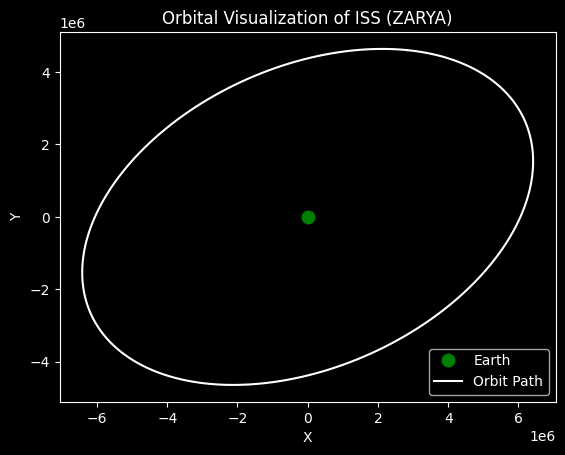

In [65]:
visualizer = Orbital_Visualizer('../tle.txt')
visualizer.extract_tle_contents()
visualizer.parse_tle()
visualizer.calc_semimajor()
visualizer.calc_orbital_period()
visualizer.plot_orbit()